## Erreur ludique

Le hasard n'est pas le hasard mathématique

Notre approche du hasard : une approche nécessaire mais pas suffisante. Nous avons supposé que le bruit suivait une loi normale.


Théorème de la limite central : Soit $X_i$  une suite de variables aléatoires définies sur le même espace de probabilité, suivant la même loi D et indépendantes. Supposons que l'espérance $\mu$ et l'écart-type $\sigma$ de D existent et soient finis. $Z_n = \sum_{i=1}^{n} X_i$ converge en loi vers la loi normale $\mathcal{N}(n\mu, n\sigma^2)$


    Première démonstration par Abraham de Moivre qui démontre que la somme de variable aléatoire suivant une loi de Bernouilli converge vers la loi normale (voir planche de Galton)

Dans notre cas, la vibration du compacteur n'est surement pas une loi normale...

La loi faible des grands nombres : Soit $ X$ une variable aléatoire admettant une variance. Soit $ (X_n)_{n\in \mathbb{N}}$ une suite de variables aléatoires indépendantes de même loi que $ X$. Alors :

$\displaystyle \forall \varepsilon >0\,\, P\left[\,\left\vert\frac{X_1+\cdots +X_n}{n} -\mathbb{E}[X]\right\vert>\varepsilon\,\right] \longrightarrow 0\,\,$   quand $\displaystyle n\longrightarrow \infty \;. $

Démonstration : On a :

$\displaystyle \mathbb{E}\left[\frac{X_1+\cdots +X_n}{n}\right] =\frac{1}{n}\sum\limits_{i=1}^n\mathbb{E}[X_i] =\mathbb{E}[X]\;, $

et

$\displaystyle Var\left[\frac{X_1+\cdots +X_n}{n}\right] =\frac{1}{n^2}\sum\limits_{i=1}^nVar[X_i] =\frac{1}{n}Var[X] \;. $

L'inégalité de Bienaymé-Tchebychev donne :

$\displaystyle P\left[\,\left\vert\frac{X_1\dots +X_n}{n}-\mathbb{E}[X]\right\vert>\varepsilon\,\right] \leq \frac{Var[X]}{n\varepsilon^2}\longrightarrow 0\,\,$   quand $\displaystyle n\longrightarrow \infty \;. $ 

Le paradoxe de l'empereur de Chine, pour mesurer l'empereur de Chine, nous pouvons demander à chaque chinois de donner la taille de l'empereur en faisant l'hypothèse suivante 
$$ x_i \leadsto \mathcal{N}(0, 1) $$

selon la loi faible des grands nombres, la moyenne converge vers la taille de l'empereur avec une précision de $$ \frac{1}{\sqrt{n}}$$ 

si $n=10^8$, la taille de l'empereur de Chine sera estimée avec une prévision du dixième de milllimètre.

Crise des subprimes : l’erreur ludique appliquée au risque d’insolvabilité

Indépendance et biais systématique. Les moindres carrés ne détectent pas un biais systématique.

La loi normale exclut les valeurs extrêmes, c'est bien adapté pour certains phénomènes (taille des individus, bruit de mesures lié à la température, ...) mais pas à d'autres (distribution des ventes de livres, des moteurs de recherches, etc.)

L'estimateur des moindres carrés n'est pas robuste : enlever les données " aberrantes " (attention danger), Exemple MM Penzias et Wilson.

Les erreurs sont appelées dans certaines théorie, les innovations... Il faut insister sur le fait qu'il faut caractériser ces sources d'erreurs (c'est à dire faire de la science)

Y = W X + b

Attention à l'asymétrie fondamentale entre Y et W dans les moindres carrés. Dans notre cas, W est bruité à cause de l'incertitude sur l'estimation des accélérations alors qu'il est considéré que tout le bruit est sur W.

Une bonne mise en oeuvre des moindres carrés linéaires et non linéaires avec des tests pour vérifier la normalité des résidus, l'indépendance, etc. 

Utilisation des variables instrumentales.


 ### référence

Etimation and Inference in Econometrics de Russell Davidson , James G. MacKinnon 

In [73]:
import numpy as np
import pickle
f = open('moindres_carres','rb')
W, Y, ddq, dq, q, couple_mesure, T, r = pickle.load(f)
f.close()

In [74]:
W=W[:,:3]

In [75]:
X=np.linalg.lstsq(W,Y)[0]
residu=Y-W.dot(X)
sigma=np.std(residu)
mu=np.mean(residu)

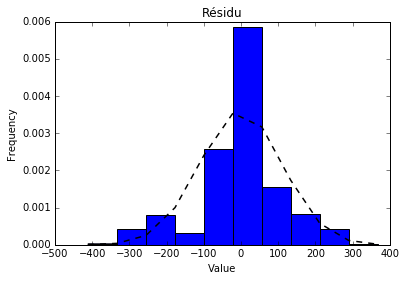

In [76]:
import matplotlib.pyplot as plt
import pylab as py
%matplotlib inline 
n, bins, patches = plt.hist(residu,normed=1)
plt.title("Résidu")
plt.xlabel("Value")
plt.ylabel("Frequency")
y = py.normpdf(bins, mu ,sigma)
l = plt.plot(bins, y, 'k--', linewidth=1.5)


In [77]:
from scipy.stats import anderson
anderson(residu, dist='norm')

AndersonResult(statistic=819.28657844774352, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [78]:
TFcouple=np.fft.fft(couple_mesure)
aTFcouple=abs(TFcouple)

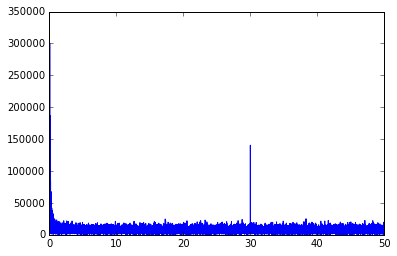

In [79]:
f=0.5/T
n=int(aTFcouple.size/2)
frequence=np.linspace(0,f,n)
plt.plot(frequence[10:(n-1)], aTFcouple[10:(n-1)])

In [64]:
from scipy.stats import anderson
anderson(residu, dist='norm')

AndersonResult(statistic=819.28657844774352, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

## Approche bayésienne pour les problèmes inverses. 



* bayésienne/logique : 
  les probabilités représentent notre état mental (Bayes). Elles sont la seule extension cohérence de la logique à l'inférence (Laplace, théorème de Cox-Jaynes).
    
    $A \implies B$, si je connais $B$, que dire de $A$ ?
		
  P(A|B) = $\frac{P(A)P(B|A)}{P(B)}$
        
dans notre exemple : $f(X, \sigma  \ | Y, I) = f(X, \sigma | I) f(Y | X,\sigma, I) / f(Y| I)$
        
$f(X, \sigma | I )$ est la distribution de probabilité de l'information a priori. Des considérations de symétrie amènent à l'a priori de Jeffreys : 

$f(X, \sigma | I ) \propto \frac{1}{\sigma}$

$f(Y | W, X, \sigma,  I )$ est la vraisemblance ou distribution de probabilité directe,

$$ f(Y | W, X, \sigma,  I ) = (2\pi \sigma^2)^{-n/2} \exp\left( -\frac{1}{\sigma^2}(Y-WX)^t(Y-WX)\right) $$

$f(Y| I )$ est un élément de normalisation.
        
$f(X, \sigma \ | Y, W, I)$ est la mise à jour de notre information a priori après la réception des données
        
        Cette équation donne la loi de probabilité des paramètres a posteriori.
        
        Dans le cas linéaire et avec beaucoup de données, les résultats sont équivalents aux méthodes classiques. 
        
        Dans le cas non linéaire, il y avait une réelle difficulté à calculer la loi a posteriori. Depuis 10 ans, l'utilisation des méthodes de Monte-Carlo permette de mettre en oeuvre cette technique sur des problèmes non linéaire. 
        

Références

Bayesian Methods: A Social and Behavioral Sciences Approach de Gill, Jeff, CRC Press, 2014, Statistics in the social and behavioral sciences series
    
Le choix Bayésien / Principes et pratiques de Christian P. Robert, Springer

The logic of Science, Jaynes


## Pourquoi minimiser les moindres carrés ?

$$ X_{Laplace}  \in \min_{X} \|W\cdot X   - Y\|  $$
	$\implies$ bruit laplacien
	$$X_{robuste} \in \min_{X} \text{mediane} \|W\cdot X   - Y\| $$
	$\implies$  49 % des mesures sont fausses

* estimation par intervalle : arithmétique des intervalles.

Référence : 

Identification de modèles paramétriques à partir de données expérimentales
à partir de données expérimentales -  Eric Walter  -  Luc Pronzato 